<a href="https://colab.research.google.com/github/Shriya8/CyberBullyBuster/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import numpy as np
import pandas as pd
import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [99]:
os.chdir("/content/drive/MyDrive/Shriya Char/Project/Code")

In [100]:
tweets_df = pd.read_csv("Datasets/cyberbullying_tweets.csv")
tweets_df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [ ]:
len(tweets_df)

In [102]:
#sorting dataset by only gender-bullying and not bullying tweets
sorted_tweets=tweets_df[(tweets_df['cyberbullying_type']=='gender') | (tweets_df['cyberbullying_type']=='not_cyberbullying') ]

In [103]:
sorted_tweets

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
15913,Any females that really know me know Ion even ...,gender
15914,RT @_chrisdowns_: #QuestionsForMen This one's ...,gender
15915,Sucks to have the smile wiped off your own fac...,gender
15916,"No. He said women choose to be gay, men don't....",gender


In [104]:
len(sorted_tweets)
#sorted_tweets.shape

15918

In [105]:
15918-len(sorted_tweets[sorted_tweets['cyberbullying_type']=='gender'])

7945

In [106]:
#import nltk
#from nltk.stem import WordNetLemmatizer
#from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize

#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('punkt')*

In [107]:
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# quiet future deprecation warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [108]:
bullying_tweets=tweets_df[(tweets_df['cyberbullying_type']=='gender') ]

In [109]:
#account for dif languages

!pip install langdetect
from langdetect import detect, detect_langs

def language_detection(text, method = "single"):

  """
  @desc:
    - detects the language of a text
  @params:
    - text: the text which language needs to be detected
    - method: detection method:
      single: if the detection is based on the first option (detect)
  @return:
    - the langue/list of languages
  """

  if(method.lower() != "single"):
    result = detect_langs(text)

  else:
    result = detect(text)

  return result

In [110]:
from langdetect import detect

def detect_english(text):
  try:
    return detect(text) == 'en'
  except:
    return False

In [111]:
#filter by english
sorted_tweets = sorted_tweets[sorted_tweets['tweet_text'].apply(detect_english)]

In [112]:
#bootstrapping
import random
np.random.seed(42)
sorted_tweets=sorted_tweets.sample(n= 20000, replace = True)

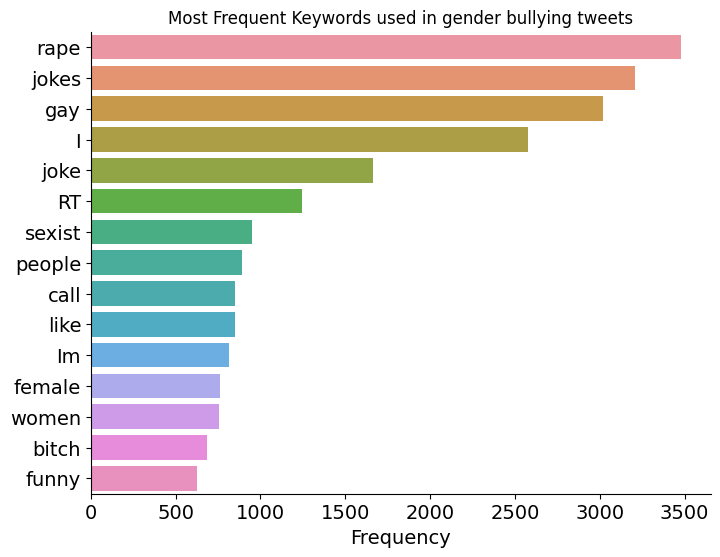

In [113]:
from collections import Counter

stpwrds = stopwords.words('english')
punctuation = string.punctuation

# try changing to visualize more or less words
num_words = 15

# text cleaning maintaining all of our text as one string
text = " ".join(bullying_tweets['tweet_text'])
# text = text.lower() # try adding this back in and see what happens!
text = "".join(_ for _ in text if _ not in punctuation)
text = [t for t in text.split() if t not in stpwrds and not t.isdigit()]

# We can use Counter to find the most frequent words in all our titles!
words = [_[0] for _ in Counter(text).most_common(num_words)]
frequency = [_[1] for _ in Counter(text).most_common(num_words)]

# Making our plot look nice!
plt.figure(figsize=(8,6));
ax = sns.barplot(x=frequency, y=words)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Most Frequent Keywords used in gender bullying tweets");
plt.xlabel("Frequency", fontsize=14);
plt.yticks(fontsize=14);
plt.xticks(fontsize=14);

In [114]:
#splitting dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(sorted_tweets["tweet_text"], sorted_tweets["cyberbullying_type"], test_size=0.2, random_state=9, stratify=sorted_tweets["cyberbullying_type"])

In [115]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16000,)
(16000,)
(4000,)
(4000,)


In [116]:
Counter(y_train)

Counter({'not_cyberbullying': 7459, 'gender': 8541})

In [ ]:
Counter(X_train)

In [118]:
Counter(y_test)

Counter({'not_cyberbullying': 1865, 'gender': 2135})

In [119]:
#Clean the text in order to extract meaningful features

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

In [121]:
def process_lang_data(text):
  '''
    For a given text, go through the process of tokenizing, removing stopwords,
    stemming / lemmatization, and removing punctuation. Return the cleaned text.
  '''
  cleaned_text = []
  punctuation = string.punctuation
  our_stopwords = stopwords.words('english')
  lemmatizer = WordNetLemmatizer()

  for token in word_tokenize(text):
    if token not in punctuation and token not in our_stopwords:
      clipped_token = lemmatizer.lemmatize(token)
      cleaned_text.append(clipped_token)

  return cleaned_text

In [122]:
#Training the data
from sklearn.feature_extraction.text import CountVectorizer

bow2 = CountVectorizer(analyzer=process_lang_data, max_features=1000) # using the function we made above
bow2.fit(X_train)                             # fitting to our training data
bow2_train = bow2.transform(X_train).toarray() # then transforming both training and testing data
bow2_test = bow2.transform(X_test).toarray()

In [123]:
print(bow2_train.shape)
print(bow2_test.shape)

(16000, 1000)
(4000, 1000)


In [124]:
y=sorted_tweets['cyberbullying_type'].values

In [125]:
print(y)

['gender' 'not_cyberbullying' 'not_cyberbullying' ... 'gender'
 'not_cyberbullying' 'not_cyberbullying']


In [126]:
bow2_train.shape

(16000, 1000)

In [127]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert labels to float32
y_train_float = y_train_encoded.astype('float32')
y_test_float = y_test_encoded.astype('float32')


In [128]:
import re

def depure_data(data):

    #Removing URLs with a regular expression
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    data = url_pattern.sub(r'', data)

    # Remove Emails
    data = re.sub('\S*@\S*\s?', '', data)

    # Remove new line characters
    data = re.sub('\s+', ' ', data)

    # Remove distracting single quotes
    data = re.sub("\'", "", data)

    return data

In [129]:
import gensim
from nltk.tokenize.treebank import TreebankWordDetokenizer

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence),     deacc=True))

def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)

In [130]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score



# MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score

# Initialize and train the MLP classifier
clf = MLPClassifier(hidden_layer_sizes=(500,4), max_iter=200)  # Adjust parameters as needed
clf.fit(bow2_train, y_train)

# Make predictions using the trained classifier
predictions2 = clf.predict(bow2_test)

# Evaluate accuracy
score = accuracy_score(y_test, predictions2)
print('MLP Model Accuracy: {:.2%}'.format(score))

# Calculate F1 score
f1_scores = f1_score(y_test, predictions2, average='macro')
print('F1 Scores:', f1_scores)
print('Precision score: ', precision_score(y_test, predictions2, average='macro'))
print('Recall Score: ', recall_score(y_test, predictions2, average='macro'))




In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score



# Assuming you have your true labels and predicted probabilities
# true_labels = y_test  # True labels (0 or 1)
# predicted_probs = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1
y_test_binary = np.where(y_test == 'gender', 1, 0)
predictions2_binary=np.where(predictions2 == 'gender', 1, 0)

fpr, tpr, thresholds = roc_curve(y_test_binary, predictions2_binary)
roc_auc = roc_auc_score(y_test_binary, predictions2_binary)
print('AUC:', roc_auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for MLP')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

cm = confusion_matrix(y_test, predictions2, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [134]:
#pip install keras



```
# This is formatted as code
```

# LSTM


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Create an LSTM-based model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=16))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using your data
model.fit(bow2_train, y_train_float, epochs=10)

# Make predictions using the trained model
predictions = model.predict(bow2_test)




In [ ]:

# Evaluate accuracy
predictions = (predictions > 0.5).astype(int).flatten()

score = accuracy_score(y_test_float, predictions)
print('LSTM Model Accuracy: {:.2%}'.format(score))

# Calculate F1 score
f1_scores = f1_score(y_test_float, predictions, average='macro')
print('F1 Scores:', f1_scores)

# Calculate Precision and Recall
precision = precision_score(y_test_float, predictions, average='macro')
recall = recall_score(y_test_float, predictions, average='macro')
print('Precision Score:', precision)
print('Recall Score:', recall)

from sklearn.metrics import roc_auc_score
# Calculate the AUC
auc = roc_auc_score(y_test_float, predictions)

# Print the AUC
print('AUC:', auc)

# Feedforward Neural Network

In [ ]:
#Search for best hyperparameters
"""import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define a function to create the model
def create_model(learning_rate=0.001, units=64):
    model = Sequential()
    model.add(Embedding(input_dim=10000, output_dim=16))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(units=units, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create a KerasClassifier wrapper for the model
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the hyperparameter grid
param_dist = {
    'learning_rate': uniform(0.0001, 0.01),  # Search range for learning rate
    'units': randint(32, 128),  # Search range for the number of units
    'epochs': [4,8,12,16],  # You can also tune other hyperparameters like epochs here
    'batch_size': [8,16,32,64]  # You can tune batch size as well
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to try
    cv=3,  # Cross-validation folds
    scoring='accuracy',  # Scoring metric
    verbose=1,
    n_jobs=-1  # Use all available CPU cores
)

# Perform the random search on your data
random_search.fit(bow2_train, y_train_float)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)"""

In [ ]:
#Feedforward neural network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
model = keras.Sequential()
model.add (keras.layers.Embedding(10000, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

optimizer = keras.optimizers.Adam(learning_rate=0.001)


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(bow2_train, y_train_float, epochs=10 )
# Make predictions using the trained classifier
predictions2_prob = model.predict(bow2_test)
predictions2 = (predictions2_prob > 0.5).astype(int).flatten()
score = accuracy_score(y_test_float, predictions2)
print('NN Model Accuracy: {:.2%}'.format(score))

# Calculate F1 score
f1_scores = f1_score(y_test_float, predictions2, average='macro')
print('F1 Scores:', f1_scores)
print('Precision score: ', precision_score(y_test_float, predictions2, average='macro'))
print('Recall Score: ', recall_score(y_test_float, predictions2, average='macro'))
auc = roc_auc_score(y_test_float, predictions2)

# Print the AUC
print('AUC:', auc)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have your true labels and predicted probabilities
# true_labels = y_test  # True labels (0 or 1)
# predicted_probs = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1

fpr, tpr, thresholds = roc_curve(y_test_float, predictions2)
roc_auc = roc_auc_score(y_test_float, predictions2)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have your true labels and predicted probabilities
# true_labels = y_test  # True labels (0 or 1)
# predicted_probs = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1

fpr, tpr, thresholds = roc_curve(y_test_float, predictions2)
roc_auc = roc_auc_score(y_test_float, predictions2)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
#print('Accuracy: {:.2%}'.format(score))

#print(f1_score(y_test, stacking_predictions, average=None))

#Logistic Regression

In [ ]:
#unfiltered
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

logistic_model = LogisticRegression()
logistic_model.fit(bow2_train, y_train)
predictions = logistic_model.predict(bow2_test)
score = accuracy_score(y_test, predictions)
print('Logistic Regression Model Accuracy: {:.2%}'.format(score))

print(f1_score(y_test, predictions, average='macro'))
print('Precision score: ', precision_score(y_test, predictions, average='macro'))
print('Recall Score: ', recall_score(y_test, predictions, average='macro'))

# Print the AUC


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have your true labels and predicted probabilities
# true_labels = y_test  # True labels (0 or 1)
#predicted_probs = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1
y_test_binary = np.where(y_test == 'gender', 1, 0)
predictions_binary=np.where(predictions == 'gender', 1, 0)


fpr, tpr, thresholds = roc_curve(y_test_binary,predictions_binary)
roc_auc = roc_auc_score(y_test_binary, predictions_binary)
print (roc_auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# SVM

In [ ]:
#unfiltered

from sklearn import svm
from sklearn.metrics import mean_absolute_error

clf = svm.SVC()
clf.fit(bow2_train,y_train)

# STEP 3: Prediction
predictions2=clf.predict(bow2_test)
# STEP 4: Evaluation
score = accuracy_score(y_test, predictions2)
print('SVC Model Accuracy: {:.2%}'.format(score))

print(f1_score(y_test, predictions2, average='macro'))
print('Precision score: ', precision_score(y_test, predictions2, average='macro'))
print('Recall Score: ', recall_score(y_test, predictions2, average='macro'))

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have your true labels and predicted probabilities
# true_labels = y_test  # True labels (0 or 1)
#predicted_probs = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1
y_test_binary = np.where(y_test == 'gender', 1, 0)
predictions_binary=np.where(predictions2 == 'gender', 1, 0)


fpr, tpr, thresholds = roc_curve(y_test_binary,predictions_binary)
roc_auc = roc_auc_score(y_test_binary, predictions_binary)
print("AUC", roc_auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Multinomial Naive Bayes



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Define a range of alpha values to search
alpha_range = [0.01, 0.1, 1.0, 10.0]

# Create a parameter grid
param_grid = {'alpha': alpha_range}

# Initialize the Multinomial Naive Bayes classifier
clf = MultinomialNB()

# Perform grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(bow2_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# STEP 1: Create and train the Naive Bayes classifier
clf = MultinomialNB(alpha=best_alpha)
clf.fit(bow2_train, y_train)

# STEP 2: Prediction
predictions2 = clf.predict(bow2_test)

# STEP 3: Evaluation
accuracy = accuracy_score(y_test, predictions2)
f1 = f1_score(y_test, predictions2, average='macro')
precision = precision_score(y_test, predictions2, average='macro')
recall = recall_score(y_test, predictions2, average='macro')

print('Multinomial Naive Bayes Model Accuracy: {:.2%}'.format(accuracy))
print('F1 Score:', f1)
print('Precision Score:', precision)
print('Recall Score:', recall)


In [ ]:
y_test_binary = np.where(y_test == 'gender', 1, 0)
predictions_binary=np.where(predictions2 == 'gender', 1, 0)


fpr, tpr, thresholds = roc_curve(y_test_binary,predictions_binary)
roc_auc = roc_auc_score(y_test_binary, predictions_binary)
print("AUC", roc_auc)



```
`# This is formatted as code`
```

# KNN

In [ ]:
#unfilterered
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Initialize and train the KNN classifier
k = 1  # Number of neighbors
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(bow2_train, y_train)

# Make predictions using the trained classifier
predictions4 = clf.predict(bow2_test)
# Evaluate accuracy
score = accuracy_score(y_test, predictions4)
print('KNN Model Accuracy: {:.2%}'.format(score))

# Calculate F1 score
f1_scores = f1_score(y_test, predictions4, average='macro')
print('F1 Scores:', f1_scores)
#print('Mean Absolute Error: ', mean_absolute_error(y_test_en, predictions4))
#print('Mean Squared Error: ', mean_squared_error(y_test_en, predictions4))
#print('Root Mean Squared Error: ', mean_squared_error(y_test_en, predictions4,squared=False))
#print('r2 SCore: ', r2_score(y_test_en, predictions4))
print('Precision score: ', precision_score(y_test, predictions4, average='macro'))
print('Recall Score: ', recall_score(y_test, predictions4, average='macro'))


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have your true labels and predicted probabilities
# true_labels = y_test  # True labels (0 or 1)
#predicted_probs = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1
y_test_binary = np.where(y_test == 'gender', 1, 0)
predictions_binary=np.where(predictions4 == 'gender', 1, 0)


fpr, tpr, thresholds = roc_curve(y_test_binary,predictions_binary)
roc_auc = roc_auc_score(y_test_binary, predictions_binary)
print ("AUC", roc_auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#print(f1_score(y_test_en, predictions4, average='macro'))
#print('Precision score: ', precision_score(y_test_en, predictions4, average=None))
#print('Recall Score: ', recall_score(y_test_en, predictions4, average=None))


# Random Forest Classifier

In [ ]:
#unfiltered
# Initialize and train the Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

n_estimators = 250 # Number of trees in the forest
clf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
clf.fit(bow2_train, y_train)

# Make predictions using the trained classifier
predictions5 = clf.predict(bow2_test)

# Evaluate accuracy
score = accuracy_score(y_test, predictions5)
print('Random Forest Model Accuracy: {:.2%}'.format(score))

# Calculate F1 score
f1_scores = f1_score(y_test, predictions5, average='macro')
print('F1 Scores:', f1_scores)
print('Precision score: ', precision_score(y_test, predictions5, average='macro'))
print('Recall Score: ', recall_score(y_test, predictions5, average= 'macro'))
auc = roc_auc_score(y_test_float, predictions5)

# Print the AUC
print('AUC:', auc)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have your true labels and predicted probabilities
# true_labels = y_test  # True labels (0 or 1)
#predicted_probs = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1
y_test_binary = np.where(y_test == 'gender', 1, 0)
predictions_binary=np.where(predictions5 == 'gender', 1, 0)


fpr, tpr, thresholds = roc_curve(y_test_binary,predictions_binary)
roc_auc = roc_auc_score(y_test_binary, predictions_binary)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Gaussian Naive Bayes

In [ ]:
#unfiltered
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
model = GaussianNB()
# Train the model using the training sets
model.fit(bow2_train,y_train)
#Predict Output
predictions3= model.predict(bow2_test) # 0:Overcast, 2:Mild

score = accuracy_score(y_test, predictions3)
print('Naive Bayes Model Accuracy: {:.2%}'.format(score))
print(f1_score(y_test, predictions3, average='macro'))

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have your true labels and predicted probabilities
# true_labels = y_test  # True labels (0 or 1)
#predicted_probs = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1
y_test_binary = np.where(y_test == 'gender', 1, 0)
predictions_binary=np.where(predictions3 == 'gender', 1, 0)


fpr, tpr, thresholds = roc_curve(y_test_binary,predictions_binary)
roc_auc = roc_auc_score(y_test_binary, predictions_binary)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions5)

In [ ]:
#unfiltered
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions4)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

cm = confusion_matrix(y_test, predictions5, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
#y_new=np.random.choice(y, 1000, replace = True) do this for sorted tweets

In [ ]:
import numpy as np
from sklearn import metrics
y = np.array([1, 1, 2, 2])
pred = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)
metrics.auc(fpr, tpr)

In [ ]:
################################################################################################################################################################################################

# Beginning of Future Research: coupling sentiment analysis with tweet classification

Useful for targetted bullying intervention

In [ ]:
from textblob import TextBlob

# Function to perform sentiment analysis on a tweet
def analyze_sentiment(tweet_text):
    analysis = TextBlob(tweet_text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Example array of tweet content
tweet_content_array = [
    "I love working on Python projects!",
    "Just finished coding a cool Python app.",
    "Feeling frustrated with this Python bug.",
    "Attended an amazing Python workshop today.",
    "Python programming is so much fun!"
]

# Analyze sentiment for each tweet in the array
for tweet_text in X_train_en:
    sentiment = analyze_sentiment(tweet_text)
    print(f"Tweet: {tweet_text}")
    print(f"Sentiment: {sentiment}")
    print('-' * 50)


In [ ]:
pip install transformers


In [ ]:
from transformers import pipeline

# Create a sentiment analysis pipeline using a pre-trained model
sentiment_analyzer = pipeline("sentiment-analysis")

# Example array of tweet content
tweet_content_array = [
    "I love working on Python projects!",
    "Just finished coding a cool Python app.",
    "Feeling frustrated with this Python bug.",
    "Attended an amazing Python workshop today.",
    "Python programming is so much fun!"
]

# Analyze sentiment for each tweet in the array
for tweet_text in X_train_en:
    result = sentiment_analyzer(tweet_text)
    sentiment = result[0]['label']
    score = result[0]['score']

    print(f"Tweet: {tweet_text}")
    print(f"Sentiment: {sentiment} (Score: {score:.2f})")
    print('-' * 50)


In [ ]:
from transformers import pipeline

# Create a sentiment analysis pipeline using a pre-trained model
sentiment_analyzer = pipeline("sentiment-analysis")

# Example array of tweet content
tweet_content_array = [
    "I love working on Python projects!",
    "Just finished coding a cool Python app.",
    "Feeling frustrated with this Python bug.",
    "Attended an amazing Python workshop today.",
    "Python programming is so much fun!"
]

# Analyze sentiment for each tweet in the array
for tweet_text in X_train_en:
    result = sentiment_analyzer(tweet_text)
    sentiment = result[0]['label']
    score = result[0]['score']

    print(f"Tweet: {tweet_text}")
    print(f"Sentiment: {sentiment} (Score: {score:.2f})")
    print('-' * 50)


In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

# Create a SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

# Example array of tweet content
tweet_content_array = [
    "I love working on Python projects!",
    "Just finished coding a cool Python app.",
    "Feeling frustrated with this Python bug.",
    "Attended an amazing Python workshop today.",
    "Python programming is so much fun!"
]

# Analyze emotions for each tweet in the array
for tweet_text in X_train_en:
    sentiment_scores = sia.polarity_scores(tweet_text)

    emotion = None
    max_score = max(sentiment_scores.values())

    if sentiment_scores['pos'] == max_score:
        emotion = 'Joy/Happiness'
    elif sentiment_scores['neg'] == max_score:
        emotion = 'Sadness'
    elif sentiment_scores['neu'] == max_score:
        emotion = 'Neutral'
    elif sentiment_scores['compound'] == max_score:
        emotion = 'Mixed/Complex'

    print(f"Tweet: {tweet_text}")
    print(f"Emotion: {emotion}")
    print('-' * 50)
